<a href="https://colab.research.google.com/github/dkofanov/calculus/blob/master/lab1/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import matplotlib.pyplot as plt
import numpy as np



Define problem:


In [42]:
U0 = 1.
V0 = 1.
A = 1.
B = 4.

def Func(u, v):
    dudt = A + (u * u * v) - (B + 1) * u
    dvdt = B * u - (u * u * v)
    return (dudt, dvdt)


Solution:

In [43]:
STEP = 0.001

def FindDelta_1s(u, v):
  du, dv = Func(u, v)
  return du * STEP, dv * STEP

def FindDelta_4s(u, v):
  # 1
  du, dv = Func(u, v)
  k1 = du * STEP, dv * STEP

  # 2
  a21 = 0.5
  du, dv = Func(u + k1[0] * a21, v + k1[1] * a21)
  k2 = du * STEP, dv * STEP

  # 3
  a32 = 0.5
  du, dv = Func(u + k2[0] * a32, v + k2[1] * a32)
  k3 = du * STEP, dv * STEP

  # 4
  a43 = 1
  du, dv = Func(u + k3[0] * a43, v + k3[1] * a43)
  k4 = du * STEP, dv * STEP

  # fin
  du = (k1[0] + 2 * (k2[0] + k3[0]) + k4[0]) / 6
  dv = (k1[1] + 2 * (k2[1] + k3[1]) + k4[1]) / 6
  return du, dv


Sovle:

In [44]:
T_MIN = 0
T_MAX = 20
ITER = int((T_MAX - T_MIN) / STEP)

DATA_1 = [[],[],[]]
DATA_2 = [[],[],[]]

def Iterate(data, functor):
  t = 0
  u = float(U0)
  v = float(V0)
  data[0].append(t)
  data[1].append(u)
  data[2].append(v)
  for i in range(ITER):
      du, dv = functor(u, v)
      t += STEP
      u += du
      v += dv
      data[0].append(t)
      data[1].append(u)
      data[2].append(v)




Text(0, 0.5, 'v axis')

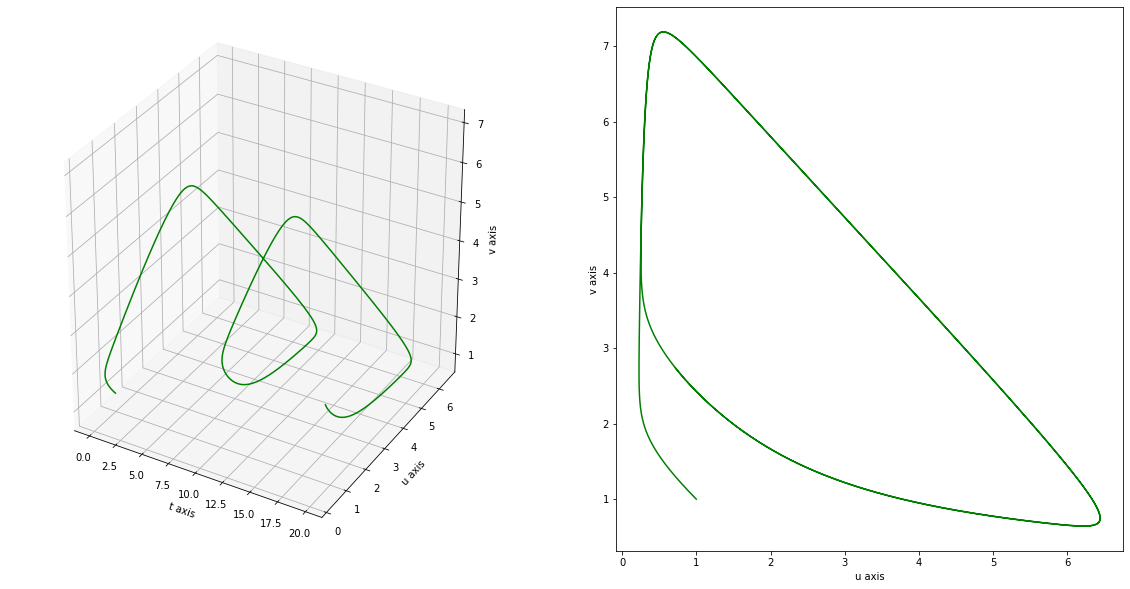

In [45]:
Iterate(DATA_1, FindDelta_1s)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot3D(DATA_1[0], DATA_1[1], DATA_1[2], 'green')
ax.set_xlabel('t axis')
ax.set_ylabel('u axis')
ax.set_zlabel('v axis')
ax = fig.add_subplot(122)
ax.plot(DATA_1[1], DATA_1[2], 'green')
ax.set_xlabel('u axis')
ax.set_ylabel('v axis')


Text(0, 0.5, 'v axis')

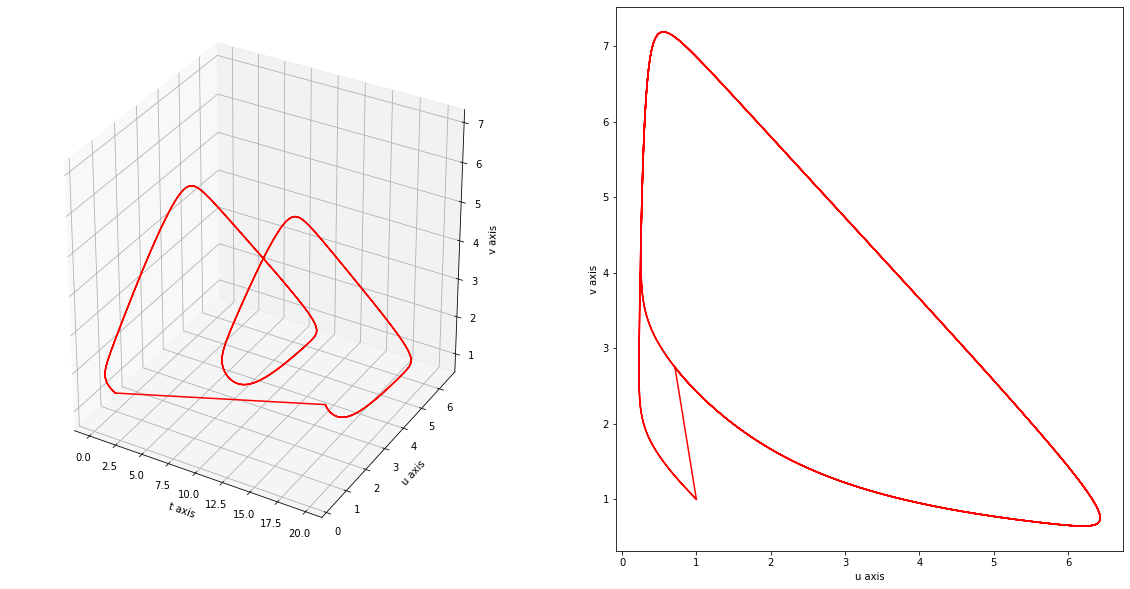

In [49]:
Iterate(DATA_2, FindDelta_4s)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121,  projection='3d')
ax.plot3D(DATA_2[0], DATA_2[1], DATA_2[2], 'red')
ax.set_xlabel('t axis')
ax.set_ylabel('u axis')
ax.set_zlabel('v axis')
ax = fig.add_subplot(122)
ax.plot(DATA_2[1], DATA_2[2], 'red')
ax.set_xlabel('u axis')
ax.set_ylabel('v axis')

Исследуем зависимость решения от параметра B:

In [47]:
# B 1 -> 5
DATAS = []
B_S = []
DATA_N = [[],[],[]]
N = 50
B_old = B
B = 5
d = (B - 1) / N
for i in range(N):
  # B [B0 -> 1]
  B -= d
  DATA_N = [[],[],[]]
  Iterate(DATA_N, FindDelta_4s)
  DATAS.append(DATA_N)
  B_S.append(B)

B = B_old

[4.92, 4.84, 4.76, 4.68, 4.6, 4.52, 4.4399999999999995, 4.359999999999999, 4.279999999999999, 4.199999999999999, 4.119999999999999, 4.039999999999999, 3.959999999999999, 3.879999999999999, 3.799999999999999, 3.719999999999999, 3.639999999999999, 3.5599999999999987, 3.4799999999999986, 3.3999999999999986, 3.3199999999999985, 3.2399999999999984, 3.1599999999999984, 3.0799999999999983, 2.9999999999999982, 2.919999999999998, 2.839999999999998, 2.759999999999998, 2.679999999999998, 2.599999999999998, 2.519999999999998, 2.4399999999999977, 2.3599999999999977, 2.2799999999999976, 2.1999999999999975, 2.1199999999999974, 2.0399999999999974, 1.9599999999999973, 1.8799999999999972, 1.7999999999999972, 1.719999999999997, 1.639999999999997, 1.559999999999997, 1.4799999999999969, 1.3999999999999968, 1.3199999999999967, 1.2399999999999967, 1.1599999999999966, 1.0799999999999965, 0.9999999999999966]


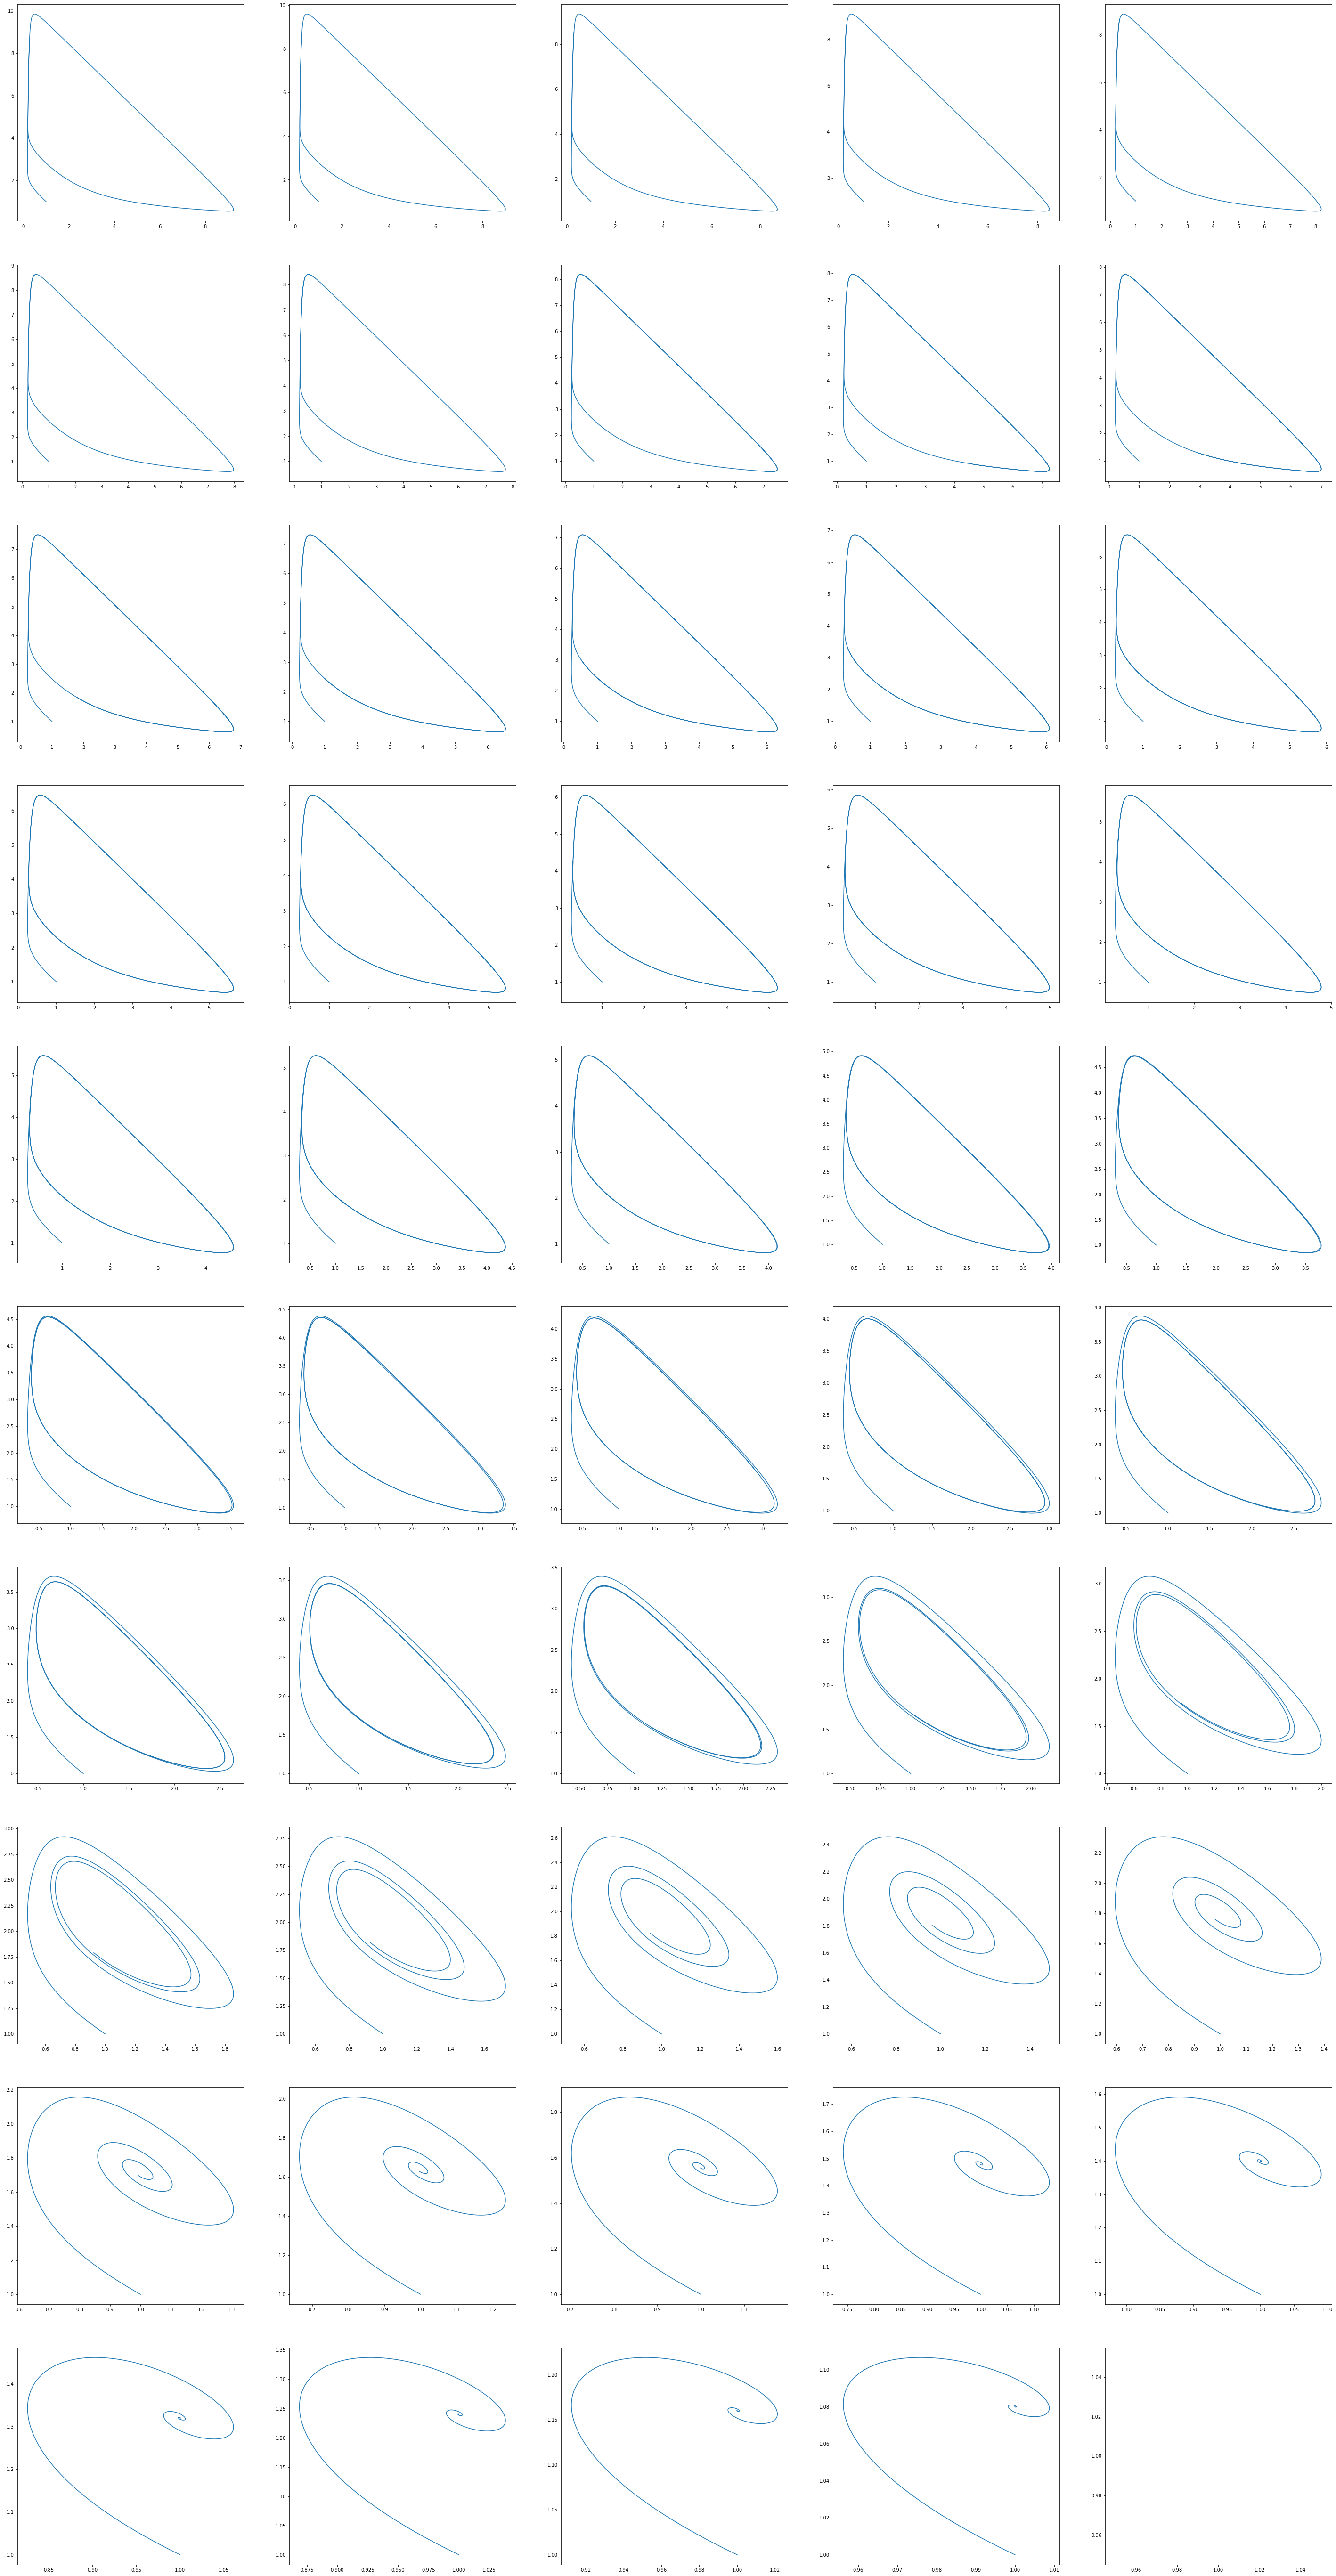

In [48]:
fig = plt.figure(figsize=(50,100))

for i in range(len(B_S)):
  ax = fig.add_subplot(len(B_S)/5, 5, i + 1)
  U = DATAS[i][1]
  V = DATAS[i][2]
  ax.plot(U, V)


print(B_S)